In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import for Ml classfifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree

#import to split train and test data
from sklearn.model_selection import train_test_split

#import for prediction evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score
from sklearn.metrics import roc_curve, auc

In [2]:
#read dataset
url_phish = pd.read_csv (r"C:\\Users\E7470\OneDrive - Robert Gordon University\Documents\Term 3\Dataset\Url dataset\dataset_small.csv", delimiter =",")
url_phish.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [3]:
#check for number of rows and columns in the dataset befor any processing
url_phish.shape

(58645, 112)

In [4]:
#check for balance of spam and ham email befor any processing
url_phish['phishing'].value_counts()



1    30647
0    27998
Name: phishing, dtype: int64

This indicates we have 27998 legitimate urls and  30647 phished urls

array([[<AxesSubplot:title={'center':'qty_dot_url'}>,
        <AxesSubplot:title={'center':'qty_hyphen_url'}>,
        <AxesSubplot:title={'center':'qty_underline_url'}>,
        <AxesSubplot:title={'center':'qty_slash_url'}>,
        <AxesSubplot:title={'center':'qty_questionmark_url'}>,
        <AxesSubplot:title={'center':'qty_equal_url'}>,
        <AxesSubplot:title={'center':'qty_at_url'}>,
        <AxesSubplot:title={'center':'qty_and_url'}>,
        <AxesSubplot:title={'center':'qty_exclamation_url'}>,
        <AxesSubplot:title={'center':'qty_space_url'}>,
        <AxesSubplot:title={'center':'qty_tilde_url'}>],
       [<AxesSubplot:title={'center':'qty_comma_url'}>,
        <AxesSubplot:title={'center':'qty_plus_url'}>,
        <AxesSubplot:title={'center':'qty_asterisk_url'}>,
        <AxesSubplot:title={'center':'qty_hashtag_url'}>,
        <AxesSubplot:title={'center':'qty_dollar_url'}>,
        <AxesSubplot:title={'center':'qty_percent_url'}>,
        <AxesSubplot:title={'

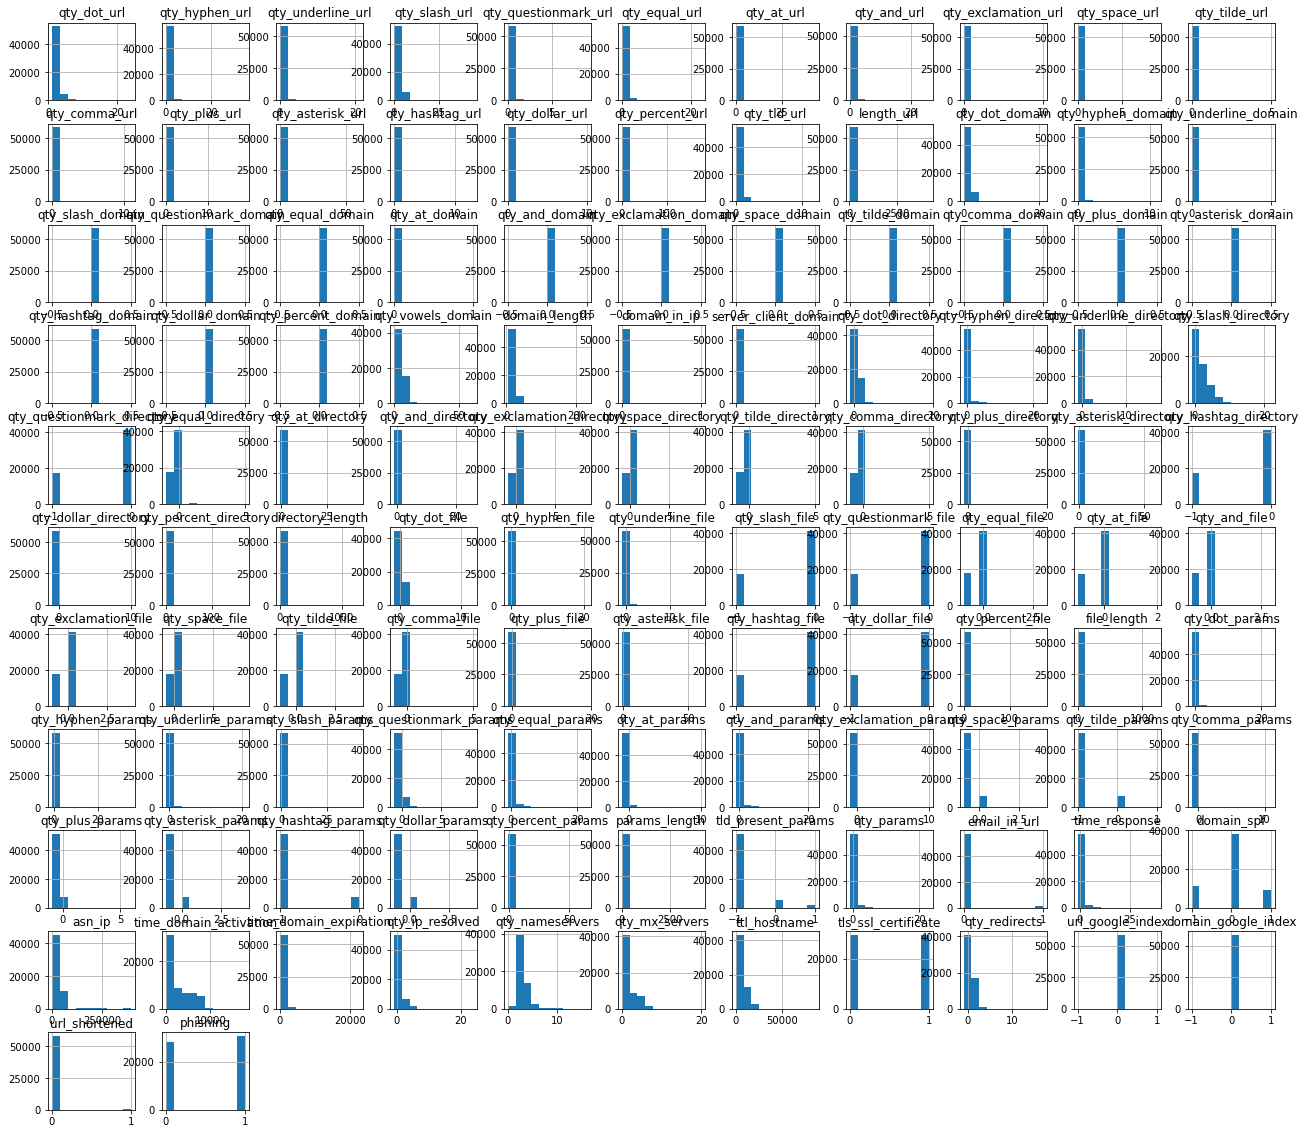

In [5]:
url_phish.hist(figsize=(22,20))

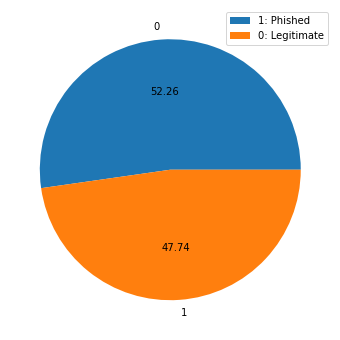

In [6]:
plt.figure(figsize=(12,6))
plt.pie(url_phish['phishing'].value_counts(), labels=[0,1], autopct='%0.2f')
plt.legend(["1: Phished","0: Legitimate"]) 
plt.show()

In [ ]:
sns.pairplot(url_phish, hue='phishing')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(url_phish.corr(), annot=True)
plt.show()

#### Split Dataset - Train & Test 

In [7]:
X = url_phish[['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 
        'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 
        'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain',
        'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
        'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 
        'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain','qty_asterisk_domain',
        'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain',
        'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 
        'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 
        'qty_questionmark_directory', 'qty_equal_directory','qty_at_directory', 'qty_and_directory',
        'qty_exclamation_directory', 'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
        'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory', 'qty_dollar_directory', 
        'qty_percent_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
        'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file', 'qty_at_file', 'qty_and_file',
        'qty_exclamation_file', 'qty_space_file', 'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
        'qty_asterisk_file', 'qty_hashtag_file','qty_dollar_file', 'qty_percent_file', 'file_length',
        'qty_dot_params', 'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params', 'qty_questionmark_params',
        'qty_equal_params', 'qty_at_params', 'qty_and_params', 'qty_exclamation_params',
        'qty_space_params', 'qty_tilde_params', 'qty_comma_params', 'qty_plus_params', 'qty_asterisk_params',
        'qty_hashtag_params', 'qty_dollar_params', 'qty_percent_params', 'params_length', 'tld_present_params',
        'qty_params', 'email_in_url', 'time_response', 'domain_spf', 'asn_ip', 'time_domain_activation',
        'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers','qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened']].values
Y = url_phish['phishing']

In [8]:
#scaling to standardize the dataset 
from sklearn.preprocessing import StandardScaler
sScaler = StandardScaler()
X = sScaler.fit_transform(X)
X= sScaler.transform(X)
Y_ = np.array(Y)

In [9]:
#splitting test size into 80/20, shuffle the data due to data balancing
X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X,Y, test_size=0.2, random_state= 42, shuffle = True)

### Model Training and Evaluation 

#### Reandom Forest 

In [10]:
#training and fitting the model

rng = np.random.RandomState(0)

rf = RandomForestClassifier(n_estimators=100,n_jobs=-1, random_state = rng)

rf.fit(X_trainset, Y_trainset)

RandomForestClassifier(n_jobs=-1,
                       random_state=RandomState(MT19937) at 0x1CC07A36940)

In [11]:
#evaluating trained model
rf_train =rf.predict(X_trainset)
rf_train_acc = accuracy_score(Y_trainset, rf_train)

print("Accuracy on training data: " , rf_train_acc)

#evaluating accuracy on test data
rf_test = rf.predict(X_testset)
rf_test_acc = accuracy_score(Y_testset,rf_test)

print("Accuracy on test data: " , rf_test_acc)

Accuracy on training data:  0.9998507971694092
Accuracy on test data:  0.9567738085088243


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5596
           1       0.96      0.96      0.96      6133

    accuracy                           0.96     11729
   macro avg       0.96      0.96      0.96     11729
weighted avg       0.96      0.96      0.96     11729



Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix - URL')

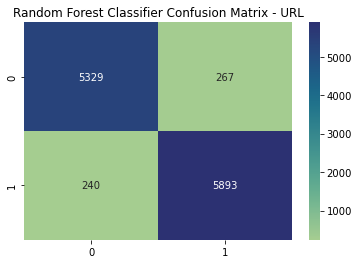

In [12]:
#Evaluating the classficiation
rf_class_report = (classification_report(Y_testset, rf_test))
print(rf_class_report)

rf_CM = confusion_matrix(Y_testset, rf_test)
sns.heatmap(rf_CM, annot = True, fmt='d', cmap='crest')
plt.title("Random Forest Classifier Confusion Matrix - URL")

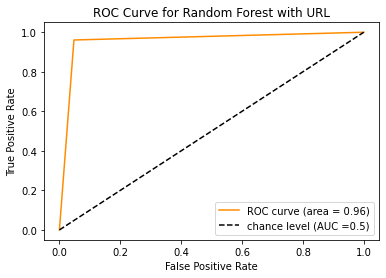

In [36]:
#calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_testset, rf_test)

#calculating auc
rf_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest with URL')
plt.legend()
plt.show()

#### K-Neighbor

In [13]:
#training and fitting the model

knc= KNeighborsClassifier()

knc.fit(X_trainset, Y_trainset)

KNeighborsClassifier()

In [14]:
#evaluating trained model
knc_train = knc.predict(X_trainset)
knc_train_acc = accuracy_score(Y_trainset, knc_train)

print("Accuracy on training data: " , knc_train_acc)

#evaluating accuracy on test data
knc_test = knc.predict(X_testset)
knc_test_acc = accuracy_score(Y_testset,knc_test)

print("Accuracy on test data: " , knc_test_acc)

Accuracy on training data:  0.9341162929491005
Accuracy on test data:  0.9106488191661694


              precision    recall  f1-score   support

           0       0.90      0.91      0.91      5596
           1       0.92      0.91      0.91      6133

    accuracy                           0.91     11729
   macro avg       0.91      0.91      0.91     11729
weighted avg       0.91      0.91      0.91     11729



Text(0.5, 1.0, 'K-Neighbors Confusion Matrix - URL')

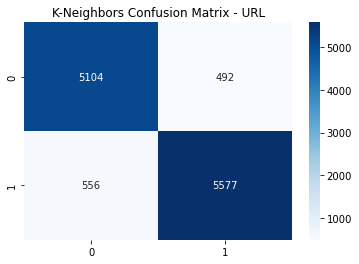

In [15]:
#Evaluating the classficiation 
knc_class_report = (classification_report(Y_testset, knc_test))
print(knc_class_report)

knc_CM = confusion_matrix(Y_testset, knc_test)
sns.heatmap(knc_CM, annot = True, fmt='d', cmap='Blues')
plt.title("K-Neighbors Confusion Matrix - URL")

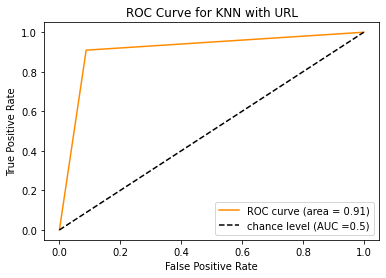

In [37]:
fpr, tpr, thresholds = roc_curve(Y_testset, knc_test)

#calculating auc
knc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % knc_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN with URL')
plt.legend()
plt.show()

#### Decision Tree Classifier

In [16]:
#training and fitting the model
dtc= DecisionTreeClassifier()

dtc.fit(X_trainset, Y_trainset)

DecisionTreeClassifier()

In [17]:
#evaluating trained model
dtc_train = dtc.predict(X_trainset)
dtc_train_acc = accuracy_score(Y_trainset, dtc_train)

print("Accuracy on training data: " , dtc_train_acc)

#evaluating accuracy on test data
dtc_test = dtc.predict(X_testset)
dtc_test_acc = accuracy_score(Y_testset,dtc_test)

print("Accuracy on test data: " , dtc_test_acc)

Accuracy on training data:  0.999893426549578
Accuracy on test data:  0.9297467814817972


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5596
           1       0.93      0.93      0.93      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix - URL')

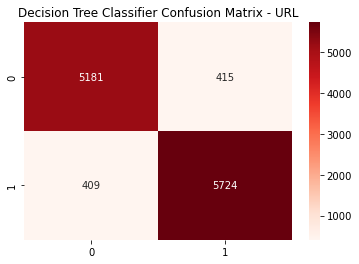

In [18]:
#Evaluating the classficiation 
dtc_class_report = (classification_report(Y_testset, dtc_test))
print(dtc_class_report)

dtc_CM = confusion_matrix(Y_testset, dtc_test)
sns.heatmap(dtc_CM, annot = True, fmt='d', cmap='Reds')
plt.title("Decision Tree Classifier Confusion Matrix - URL")

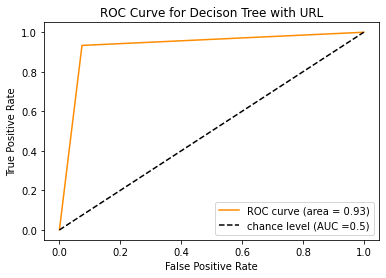

In [38]:
fpr, tpr, thresholds = roc_curve(Y_testset, dtc_test)

#calculating auc
dtc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % dtc_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decison Tree with URL')
plt.legend()
plt.show()

#### Support Vector Machine

In [19]:
#the parmeter set to introudce its handing od high deminsion sparse matrix
svm = SVC(kernel = 'linear', C = 1, gamma = 'scale')

#training the model
svm.fit(X_trainset, Y_trainset)

SVC(C=1, kernel='linear')

In [20]:
#evaluating trained model
svm_train =svm.predict(X_trainset)
svm_train_acc = accuracy_score(Y_trainset, svm_train)

print("Accuracy on training data: " , svm_train_acc)

#evaluating accuracy on test data
svm_test = svm.predict(X_testset)
svm_test_acc = accuracy_score(Y_testset,svm_test)

print("Accuracy on test data: " , svm_test_acc)

Accuracy on training data:  0.8661650609600137
Accuracy on test data:  0.8645238298235144


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5596
           1       0.87      0.87      0.87      6133

    accuracy                           0.86     11729
   macro avg       0.86      0.86      0.86     11729
weighted avg       0.86      0.86      0.86     11729



Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix - URL')

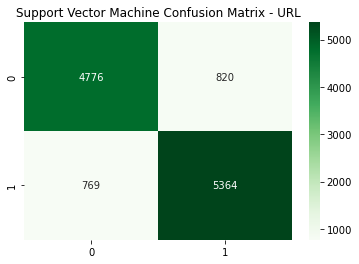

In [21]:
#Evaluating the classficiation 
svm_class_report = (classification_report(Y_testset, svm_test))
print(svm_class_report)

svm_CM = confusion_matrix(Y_testset, svm_test)
sns.heatmap(svm_CM, annot = True, fmt='d', cmap='Greens')
plt.title("Support Vector Machine Confusion Matrix - URL")

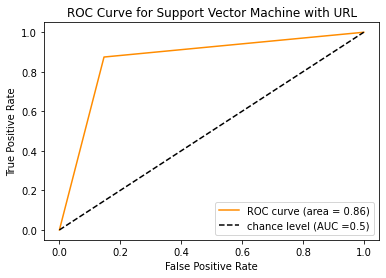

In [39]:
fpr, tpr, thresholds = roc_curve(Y_testset, svm_test)

#calculating auc
svm_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % svm_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine with URL')
plt.legend()
plt.show()

#### Logistic Regression

In [33]:
lr = LogisticRegression(max_iter = 10000)

#training the model
lr.fit(X_trainset, Y_trainset)

LogisticRegression(max_iter=10000)

In [34]:
#evaluating trained model
lr_train = lr.predict(X_trainset)
lr_train_acc = accuracy_score(Y_trainset, lr_train)

print("Accuracy on training data: " , lr_train_acc)

#evaluating accuracy on test data
lr_test = lr.predict(X_testset)
lr_test_acc = accuracy_score(Y_testset, lr_test)

print("Accuracy on test data: " , lr_test_acc)

Accuracy on training data:  0.8686588796998892
Accuracy on test data:  0.8650353823855401


              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5596
           1       0.86      0.88      0.87      6133

    accuracy                           0.87     11729
   macro avg       0.87      0.86      0.86     11729
weighted avg       0.87      0.87      0.86     11729



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix - URL')

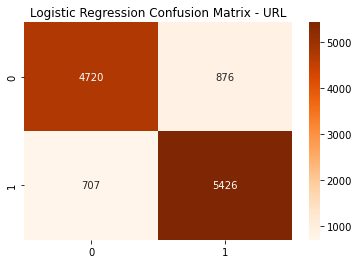

In [35]:
#Evaluating the classficiation 
lr_class_report = (classification_report(Y_testset, lr_test))
print(lr_class_report)

lr_CM = confusion_matrix(Y_testset, lr_test)
sns.heatmap(lr_CM, annot = True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix - URL")

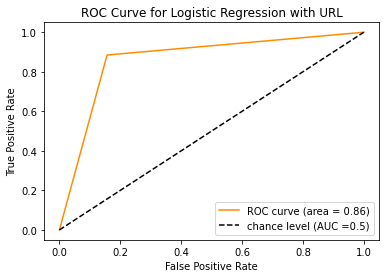

In [40]:
fpr, tpr, thresholds = roc_curve(Y_testset, lr_test)

#calculating auc
lr_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with URL')
plt.legend()
plt.show()

#### XGBoost

In [25]:
xgb = XGBClassifier()

#training the model
xgb.fit(X_trainset, Y_trainset)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
#evaluating trained model
xgb_train = xgb.predict(X_trainset)
xgb_train_acc = accuracy_score(Y_trainset, xgb_train)

print("Accuracy on training data: " , xgb_train_acc)

#evaluating accuracy on test data
xgb_test = xgb.predict(X_testset)
xgb_test_acc = accuracy_score(Y_testset,xgb_test)

print("Accuracy on test data: " , xgb_test_acc)

Accuracy on training data:  0.9747634069400631
Accuracy on test data:  0.9539602694176826


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5596
           1       0.95      0.96      0.96      6133

    accuracy                           0.95     11729
   macro avg       0.95      0.95      0.95     11729
weighted avg       0.95      0.95      0.95     11729



Text(0.5, 1.0, 'XGBoost Confusion Matrix - URL')

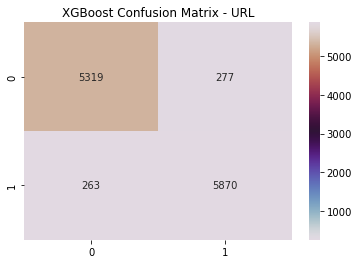

In [27]:
#Evaluating the classficiation 
xgb_class_report = (classification_report(Y_testset, xgb_test))
print(xgb_class_report)

xgb_CM = confusion_matrix(Y_testset, xgb_test)
sns.heatmap(xgb_CM, annot = True, fmt='d', cmap='twilight')
plt.title("XGBoost Confusion Matrix - URL")

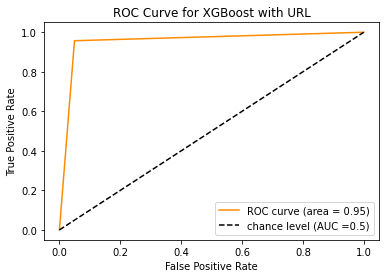

In [41]:
fpr, tpr, thresholds = roc_curve(Y_testset, xgb_test)

#calculating auc
xgb_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost with URL')
plt.legend()
plt.show()

#### AdaBoost

In [28]:
adb = AdaBoostClassifier(DecisionTreeClassifier())

#training the model
adb.fit(X_trainset, Y_trainset)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

In [29]:
#evaluating trained model
adb_train = adb.predict(X_trainset)
adb_train_acc = accuracy_score(Y_trainset, adb_train)

print("Accuracy on training data: " , adb_train_acc)

#evaluating accuracy on test data
adb_test = adb.predict(X_testset)
adb_test_acc = accuracy_score(Y_testset,adb_test)

print("Accuracy on test data: " , adb_test_acc)

Accuracy on training data:  0.999893426549578
Accuracy on test data:  0.9346065308210418


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5596
           1       0.94      0.94      0.94      6133

    accuracy                           0.93     11729
   macro avg       0.93      0.93      0.93     11729
weighted avg       0.93      0.93      0.93     11729



Text(0.5, 1.0, 'AdaBoost Confusion Matrix - URL')

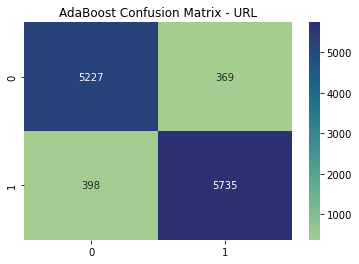

In [30]:
#Evaluating the classficiation 
adb_class_report = (classification_report(Y_testset, adb_test))
print(adb_class_report)

adb_CM = confusion_matrix(Y_testset, adb_test)
sns.heatmap(adb_CM, annot = True, fmt='d', cmap='crest')
plt.title("AdaBoost Confusion Matrix - URL")

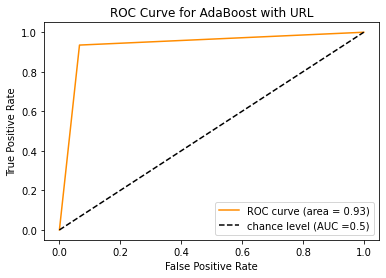

In [43]:
fpr, tpr, thresholds = roc_curve(Y_testset, adb_test)

#calculating auc
adb_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % adb_auc)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC =0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost with URL')
plt.legend()
plt.show()

In [44]:
for_models_predicted = ['Random Forest(RF)','K Nearest Neighbors (KNN)','Decision Tree (DT)',
                   'Support Vector (SV)', 'Logistics Regression (LR)','XGBOOST (XGB)','AdaBoost (ADB)']
acc_list = [rf_test_acc, knc_test_acc, dtc_test_acc, svm_test_acc,
                       lr_test_acc, xgb_test_acc, adb_test_acc]

result = pd.DataFrame({'Models with URL':for_models_predicted,'Accuracy %': acc_list})
result.set_index('Models with URL',inplace=True)
result


,Accuracy %
Models with URL,
Random Forest(RF),0.956774
K Nearest Neighbors (KNN),0.910649
Decision Tree (DT),0.929747
Support Vector (SV),0.864524
Logistics Regression (LR),0.865035
XGBOOST (XGB),0.953960
AdaBoost (ADB),0.934607
